<a href="https://colab.research.google.com/github/ayushanand18/pyobis/blob/dataset-viz/notebooks/contributions_quantification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantifying and visualizing contributions from person and organization

This notebook entails the quantitative analysis of contributions made by individuals and organisations to the OBIS data base. 

We will use `pyobis` to fetch data.

## Installing `pyobis`

In [1]:
try:
  import pyobis
except:
  !pip install -q "git+https://github.com/iobis/pyobis.git"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


#### importing other modules

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)}, style="darkgrid")

In [4]:
from pyobis import occurrences as occ
from pyobis import dataset

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Grabbing data

For our analysis we will need to restrict ourselves to only a specific datasets. We will fetch all the datasets recorded between 2017-2018 and see the distribution among providers.

In [6]:
res = dataset.search(startdate="2017-01-01", enddate="2018-12-12")["results"]

Now we will convert this data into a pandas DataFrame.

In [7]:
data = pd.DataFrame(res)
data

,id,url,archive,published,created,updated,core,extensions,statistics,extent,...,citation_id,abstract,intellectualrights,feed,institutes,contacts,nodes,keywords,downloads,records
0,aac5ca81-638a-4335-9aa7-5c2bda67a362,https://ipt.inbo.be/resource?r=lbbg_zeebrugge,https://ipt.inbo.be/archive.do?r=lbbg_zeebrugge,2022-06-10T14:46:22.000Z,2022-06-01T14:47:54.732Z,2022-06-11T08:55:36.376Z,occurrence,[],"{'Event': 0, 'absence': 0, 'dropped': 0, 'Occu...","POLYGON((-17.77747 12.355771,-17.77747 57.4918...",...,None,This animal tracking dataset is derived from S...,"To the extent possible under law, the publishe...","{'id': '2b52ff52-bd4f-4800-97b6-882bc7698a22',...","[{'name': 'University of Amsterdam, Faculty of...","[{'role': None, 'type': 'creator', 'givenname'...",[{'id': '4bf79a01-65a9-4db6-b37b-18434f26ddfc'...,"[{'keyword': 'animal movement', 'thesaurus': '...","[{'year': 2022, 'downloads': 640, 'records': 3...",651423
1,74d67d71-2d25-4fa1-9a1e-df71c6af891e,https://www.marine.csiro.au/ipt/resource?r=bio...,https://www.marine.csiro.au/ipt/archive.do?r=b...,2022-08-03T02:04:26.000Z,2020-06-21T12:17:59.993Z,2022-08-04T18:52:19.151Z,occurrence,[],"{'Event': 0, 'absence': 0, 'dropped': 495943, ...",None,...,None,The Australian Marine Microbial Biodiversity I...,This work is licensed under a Creative Common...,"{'id': '42683bd2-2415-405b-8ddf-f7e9ca0d339e',...",[{'name': 'CSIRO National Collections and Mari...,"[{'role': None, 'type': 'creator', 'givenname'...",[{'id': '2a57cd59-6799-4579-955e-27c9af97aea4'...,"[{'keyword': 'occurrence', 'thesaurus': 'GBIF ...","[{'year': 2022, 'downloads': 1585, 'records': ...",535546
2,2ac6b17f-3b3a-4e0f-b712-3b640bf79147,https://www.marine.csiro.au/ipt/resource?r=bio...,https://www.marine.csiro.au/ipt/archive.do?r=b...,2022-08-02T23:52:58.000Z,2020-06-21T12:44:11.592Z,2022-08-03T21:09:35.585Z,occurrence,[],"{'Event': 0, 'absence': 0, 'dropped': 290825, ...",None,...,None,The Australian Marine Microbial Biodiversity I...,This work is licensed under a Creative Common...,"{'id': '42683bd2-2415-405b-8ddf-f7e9ca0d339e',...",[{'name': 'CSIRO National Collections and Mari...,"[{'role': None, 'type': 'creator', 'givenname'...",[{'id': '2a57cd59-6799-4579-955e-27c9af97aea4'...,"[{'keyword': 'occurrence', 'thesaurus': 'GBIF ...","[{'year': 2022, 'downloads': 1863, 'records': ...",504709
3,2c4f07c6-1c02-4082-88da-9e51b7897f24,https://www.marine.csiro.au/ipt/resource?r=bio...,https://www.marine.csiro.au/ipt/archive.do?r=b...,2022-06-24T04:39:34.000Z,2020-06-20T14:01:17.907Z,2022-06-24T15:44:28.300Z,occurrence,[],"{'Event': 0, 'absence': 0, 'dropped': 505736, ...",None,...,None,The Australian Marine Microbial Biodiversity I...,This work is licensed under a Creative Common...,"{'id': '42683bd2-2415-405b-8ddf-f7e9ca0d339e',...",[{'name': 'CSIRO National Collections and Mari...,"[{'role': None, 'type': 'creator', 'givenname'...",[{'id': '2a57cd59-6799-4579-955e-27c9af97aea4'...,"[{'keyword': 'occurrence', 'thesaurus': 'GBIF ...","[{'year': 2022, 'downloads': 1768, 'records': ...",483556
4,8b0d5fdd-6a3f-48c7-a4aa-84f39f2df647,https://www.marine.csiro.au/ipt/resource?r=bio...,https://www.marine.csiro.au/ipt/archive.do?r=b...,2022-08-03T02:05:07.000Z,2020-06-21T12:31:22.183Z,2022-08-05T10:51:58.796Z,occurrence,[],"{'Event': 0, 'absence': 0, 'dropped': 538392, ...",None,...,None,The Australian Marine Microbial Biodiversity I...,This work is licensed under a Creative Common...,"{'id': '42683bd2-2415-405b-8ddf-f7e9ca0d339e',...",[{'name': 'CSIRO National Collections and Mari...,"[{'role': None, 'type': 'creator', 'givenname'...",[{'id': '2a57cd59-6799-4579-955e-27c9af97aea4'...,"[{'keyword': 'occurrence', 'thesaurus': 'GBIF ...","[{'year': 2022, 'downloads': 1658, 'records': ...",464032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,dc4fe74c-cb85-48e9-a1d8-ff5a39737e40,http://ipt.env.duke.edu/resource?r=zd_1704,https://ipt.env.duke.edu/archive.do?r=zd_1704,2022-06-07T23:49:0

Now let us see the data provider's details.

In [ ]:
data["contacts"]

0      [{'role': None, 'type': 'creator', 'givenname'...
1      [{'role': None, 'type': 'creator', 'givenname'...
2      [{'role': None, 'type': 'creator', 'givenname'...
3      [{'role': None, 'type': 'creator', 'givenname'...
4      [{'role': None, 'type': 'creator', 'givenname'...
                             ...                        
688    [{'role': None, 'type': 'creator', 'givenname'...
689    [{'role': None, 'type': 'creator', 'givenname'...
690    [{'role': None, 'type': 'creator', 'givenname'...
691    [{'role': None, 'type': 'creator', 'givenname'...
692    [{'role': None, 'type': 'creator', 'givenname'...
Name: contacts, Length: 693, dtype: object

We can see that the data provider details are nested into lists of dictionaries. We will need to unnest this data and gather information about dataset owner.

In [8]:
unnest_df = pd.json_normalize(res, "contacts", ["id"]) # we will identify the records using dataset UUID
unnest_df

,role,type,givenname,surname,organization,position,email,url,organization_oceanexpert_id,type_display,id
0,None,creator,Eric W.M.,Stienen,Research Institute for Nature and Forest,None,None,None,17039.0,Creator,aac5ca81-638a-4335-9aa7-5c2bda67a362
1,None,creator,Peter,Desmet,Research Institute for Nature and Forest (INBO),None,None,None,17039.0,Creator,aac5ca81-638a-4335-9aa7-5c2bda67a362
2,None,creator,Tanja,Milotic,Research Institute for Nature and Forest,None,None,None,17039.0,Creator,aac5ca81-638a-4335-9aa7-5c2bda67a362
3,None,creator,Francisco,Hernandez,Flanders Marine Institute,None,None,None,NaN,Creator,aac5ca81-638a-4335-9aa7-5c2bda67a362
4,None,creator,Klaas,Deneudt,Flanders Marine Institute,None,None,None,NaN,Creator,aac5ca81-638a-4335-9aa7-5c2bda67a362
...,...,...,...,...,...,...,...,...,...,...,...
5263,distributor,associatedParty,None,OBIS-SEAMAP,"Marine Geospatial Ecology Lab, Duke University",None,seamap-contact@duke.edu,http://seamap.env.duke.edu,19393.0,Distributor,fda6d4a4-8d14-45bc-9b4c-24d89fd213ab
5264,owner,associatedParty,Marina,Costa,Tethys Research Institute,Primary contact,marinza.costa@gmail.com,www.tethys.org,NaN,Owner,fda6d4a4-8d14-45bc-9b4c-24d89fd213ab
5265,originator,associatedParty,Giuseppe,Notarbartolo di Sciara,Tethys Research Institute,Secondary contact,tethys@tethys.org,www.tethys.org,NaN,Originator,fda6d4a4-8d14-45bc-9b4c-24d89fd213ab
5266,owner,personnel,Marina,Costa,None,None,None,None,NaN,Owner,fda6d4a4-8d14-45bc-9b4c-24d89fd213ab


Now that we have unnested the creator data, let us see the specifics.

In [ ]:
unnest_df[unnest_df["position"]=="Primary contact"].groupby("id").givenname.count()

id
00e92406-7ace-4fae-aae1-a294c7dec151    3
026d9e46-1734-44b3-84da-9048df73b4f6    3
034e9fa8-2640-49df-89cc-81590b5d11d2    3
03d772f9-454f-42f6-91df-4d1faf2ead16    3
03dc7648-e915-45b8-ab5b-b3a16a3664b4    3
                                       ..
fe558aab-4a93-4f9f-b525-b481ad68e2b6    3
fecb2219-2c7d-4324-8a13-e95fe552a743    3
fef0bdef-04de-4968-a5e2-d267463d00af    3
fefcba02-f27c-448e-8038-e4a5e0bd51d7    3
ff91dc4c-b725-45d9-9bfa-f046b36a9f0b    3
Name: givenname, Length: 223, dtype: int64

Now we will fetch dataset owner's name and add it to subsequent records in our original dataframe.

In [9]:
data["owner_name"] = np.NaN
for id in unnest_df.id.unique():
  x = unnest_df[(unnest_df["id"]==id) & (unnest_df["position"]=="Primary contact") & (unnest_df["type_display"]=="Owner")]
  if(x["givenname"].any() and x["surname"].any()): # we will also need to check if it's null
    index = data[data["id"]==id].index
    data.at[index, "owner_name"] = x["givenname"].values[0] + " " + x["surname"].values[0]

Now let us look back at the dataframe.

In [ ]:
data["owner_name"]

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
           ...      
688    Ted Cheeseman
689              NaN
690    Ted Cheeseman
691    Ted Cheeseman
692     Marina Costa
Name: owner_name, Length: 693, dtype: object

### Grab occurrences data
Let's grab top 5 records for top 3 names and fetch their data.

In [ ]:
data.sort_values("records")["owner_name"].unique()

array(['Marina Costa', 'Ted Cheeseman', nan, 'Gwen Lockhart',
       'Joe Evenson', 'Diego Amorocho', 'Lindsay Dubbs', 'Jooke Robbins',
       'Kristen Hart', 'Jeffrey Seminoff', 'Nicolas Pilcher',
       'Warren Baverstock', 'Jackie Watch', 'Daniel Costa',
       'Paolo Luschi', 'Joshua Eberdong', 'Patrick Robinson',
       'Catherine Hart', 'William McLellan', 'Jimena Rodriguez',
       'Zahirul Islam', 'Yonat Swimmer', 'Todd Rimkus', 'Monique Pool',
       'Timothy Gowan', 'Mat Vanderklift', 'Kristen Ampela',
       'Alan Zavala', 'Lluvia Soto', 'M. Pintos', 'Marie C. Hill',
       'Jeffrey Mangel', 'Silvia Frey', 'Aubrey Strydom', 'Gina Rappucci',
       'Arthur Kopelman', 'Julia Haywood', 'Israel Center',
       'Robin Exeter', 'Richard Pillans', 'Eduardo Belda', 'Nuria Cruz',
       'Amy Engelhaupt', 'Michelle Vukovich', 'Stellwagen Sanctuary',
       'Sarah Kienle', 'Beth Josephson', 'Laura Dias', 'Errol Ronje',
       'Hannah Myers', 'Andrea Krzystan', 'Tim Cole', 'Jeffrey Moor

So the top 3 names are "Marina Costa", "Ted Cheeseman" and "Gwen Lockhart" (excluding the nan names).

In [10]:
record_ids = {}
for j in ["Marina Costa", "Ted Cheeseman", "Gwen Lockhart"]:
  record_ids[j] = data[data["owner_name"]==j].sort_values("records")["id"].values[0:3].tolist()
record_ids

{'Gwen Lockhart': ['58adbf92-9eb1-486f-a968-593942337f0d',
  '3f699014-4818-46d7-9544-e7f32f715400'],
 'Marina Costa': ['fda6d4a4-8d14-45bc-9b4c-24d89fd213ab'],
 'Ted Cheeseman': ['f49b2ebe-d278-4454-8b3e-c04eb3c0362d',
  '026d9e46-1734-44b3-84da-9048df73b4f6',
  '0af86daa-cc5a-4215-b193-f11a8d0320c2']}

In [11]:
def handlevector(vector):
  string = str(vector)
  string = string.replace("[",'').replace(']','').replace('\'','').replace(' ','')
  return string

In [12]:
l = []
for i in record_ids.values():
  l.append(i)
occ_data = occ.search(datasetid=handlevector(l))

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 1216/1216
Fetched 1216 records.


In [13]:
occ_df = pd.DataFrame(occ_data["results"])
occ_df

,infraphylum,megaclass,date_year,scientificNameID,scientificName,dynamicProperties,superfamilyid,individualCount,associatedReferences,dropped,...,brackish,terrestrial,rightsHolder,locality,eventTime,associatedMedia,recordedBy,infraspecificEpithet,subspecies,subspeciesid
0,Gnathostomata,Tetrapoda,2012,urn:lsid:marinespecies.org:taxname:137205,Caretta caretta,MachineObservation,987094.0,2,"[{""crossref"":{""citeinfo"":{""origin"":""Coyne, M. ...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gnathostomata,Tetrapoda,2015,urn:lsid:marinespecies.org:taxname:137205,Caretta caretta,MachineObservation,987094.0,2,"[{""crossref"":{""citeinfo"":{""origin"":""Coyne, M. ...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2003,urn:lsid:marinespecies.org:taxname:254983,Tursiops aduncus,NaN,148723.0,3,"[{""crossref"":{""citeinfo"":{""origin"":""Notarbarto...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2012,urn:lsid:marinespecies.org:taxname:254983,Tursiops aduncus,NaN,148723.0,2,"[{""crossref"":{""citeinfo"":{""origin"":""Notarbarto...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2011,urn:lsid:marinespecies.org:taxname:137105,Stenella attenuata,NaN,148723.0,10,"[{""crossref"":{""citeinfo"":{""origin"":""Notarbarto...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,NaN,NaN,2011,urn:lsid:marinespecies.org:taxname:137111,Tursiops truncatus,NaN,148723.0,3,"[{""crossref"":{""citeinfo"":{""origin"":""Notarbarto...",False,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1212,NaN,NaN,2008,urn:lsid:marinespecies.org:taxname:254983,Tursiops aduncus,NaN,148723.0,15,"[{""crossref"":{""citeinfo"":{""origin"":""Notarbarto...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1213,NaN,NaN,2006,urn:lsid:marinespecies.org:taxname:137024,Stenella,NaN,148723.0,30,"[{""crossref"":{""citeinfo"":{""origin"":""Notarbarto...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,Gnathostomata,Tetrapoda,2015,urn:lsid:marinespecies.org:taxname:137205,Caretta caretta,MachineObservation,987094.0,2,"[{""crossref"":{""citeinfo"":{""origin"":""Coyne, M. ...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have grabbed our data let us fit in the names to this dataframe corresponding to the occurrence id.

In [14]:
occ_df["owner_name"] = np.nan
for key in record_ids:
  for item in record_ids[key]:
    index = occ_df[occ_df["dataset_id"]==item].index
    occ_df.loc[index,"owner_name":"owner_name"] = key

Now that we have fitted in the names, let us view the specifics.

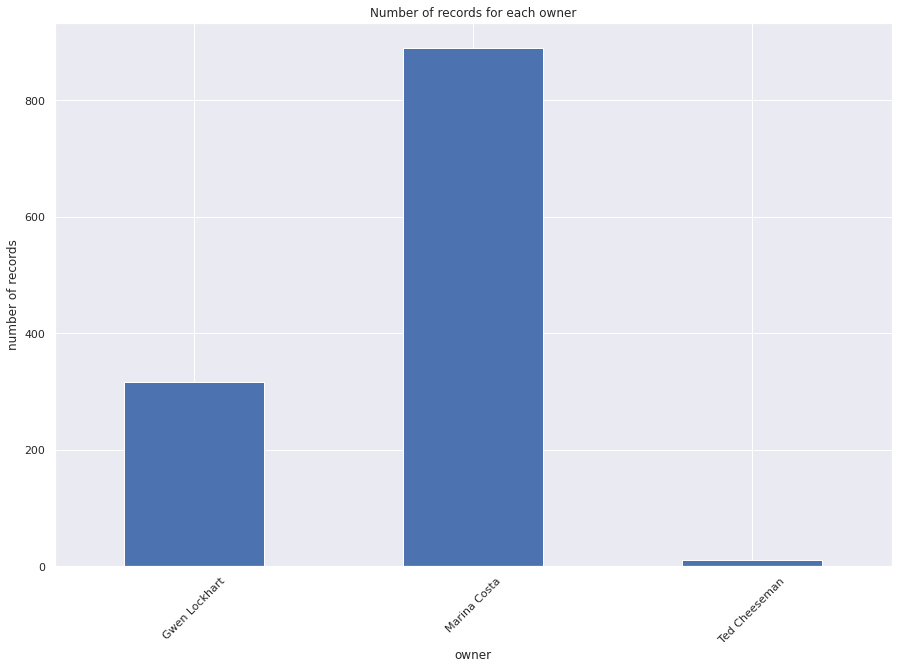

In [ ]:
occ_df.groupby("owner_name").scientificName.count().plot.bar()
plt.title("Number of records for each owner")
plt.xlabel("owner")
plt.ylabel("number of records")
plt.xticks(rotation=45)
plt.show();

We can see that most of the records are contributed by `"Marina Costa"`, cheers to her! Since we do not have a diverse portfolio we might get some majority bias.

We are now ready to begin with our visualization, let's get started.

----
### Taxonomic Distribution

what taxons have been covered

In [ ]:
@interact
def show_contribution_per_owner(owner =list(occ_df["owner_name"].unique())):
  plt.title(f"Distribution of species by {owner}")
  occ_df[occ_df["owner_name"]==owner].groupby("scientificName")["scientificName"].agg('count').plot.pie(autopct="%.2f%%", labels=[""]*len(occ_df[occ_df["owner_name"]==owner]))
  plt.legend(bbox_to_anchor=(1.2,1.05),loc="right",labels=occ_df[occ_df["owner_name"]==owner]["scientificName"].unique())
  return plt.show();

interactive(children=(Dropdown(description='owner', options=('Gwen Lockhart', 'Marina Costa', 'Ted Cheeseman')…

---

## Spatial Analysis

Let us plot the occurrence records on a world map and look at particularly where are these records present per the dataset owner.

In [ ]:
try:
  import geopandas as gpd
except:
  %pip install geopandas
  import geopandas as gpd

In [16]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [17]:
import seaborn as sns

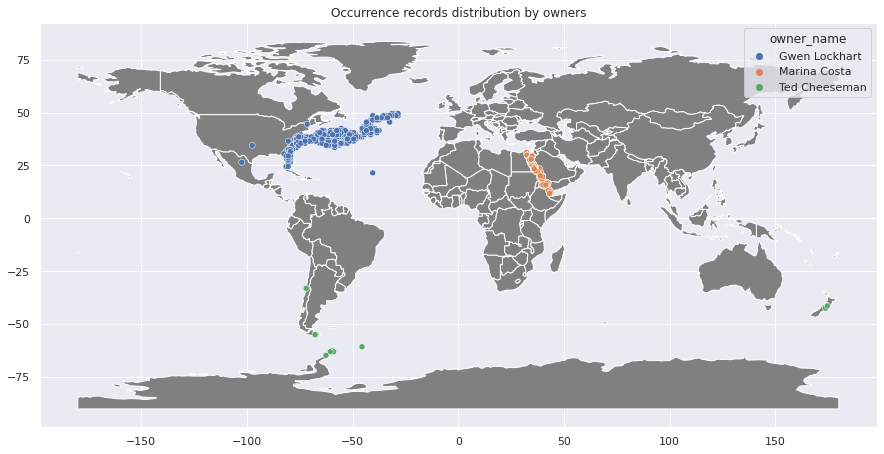

In [ ]:
countries.plot(color="grey")
sns.scatterplot(x="decimalLongitude", y="decimalLatitude", hue="owner_name", data=occ_df)
plt.xlabel("")
plt.ylabel("")
plt.title("Occurrence records distribution by owners")
plt.show()

----
### Temporal Distribution

Let us view how the records span over time for each dataset owner.

In [21]:
from datetime import datetime as dt

In [53]:
import plotly.express as px

In [90]:
# we will get the lowest start date and farthest start date among all the records grouped by the owner name
x1 = (occ_df.groupby("owner_name")["date_start"].agg([np.min,np.max])/1000)[["amin","amax"]].apply([dt.fromtimestamp])

# now we will fetch the names of owners against each row. we are doing this because it will help us create a plotly time plot easily
x1["ownername"] = (occ_df.groupby("owner_name")["date_start"].agg([np.min,np.max])/1000)[["amin","amax"]].apply([dt.fromtimestamp]).index
x1.columns = ["min","max", "ownername"]
# let us now look at the updated dataframe
x1

In [96]:
fig = px.timeline(x1, x_start="min", x_end="max", y = "ownername")
fig.update_yaxes(autorange="reversed")
fig.update_layout(
    xaxis_title="year", yaxis_title="owner name", title="records distrubition over year for each owner"
)
fig.show()

We can see from this plot that records contirbuted by Marina Costa span the longest time with nearly 33 years. So, if we wish to do a time-series analysis then her datasets will be a good start.

----
### What MoFs are included?

Let us study the MeasurementOrFact records distribution for these dataset ids.

In [ ]:
mof_df = occ.search(datasetid=handlevector(l), mof=True, hasextensions="MeasurementOrFact")

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 0/0
Fetched 0 records.


Unfortunately, no MoFs are inluded for these datasets.

----
### What makes this dataset unique?

+ Firstly, as we witnessed in our temporal analysis that records contributed by Marina Costa span the longest time with nearly 33 years. So, this dataset can help researchers track down on species change over signficantly long period.
+ Datasets contributed by Gwen Lockhart cover a significant proportion of the North Atlantic Ocean. As clear from our previous visualization, we can say that this dataset has wide spatial coverage in the atlantic.